# Analysis (Movies)

Equipo : 
* Malváez Flores Axel Daniel
* Licea Becerril Santiago
* Peralta Rionda Gabriel Zadquiel

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos nuestros datos

In [103]:
ratings = pd.read_csv('../Data/data-movie-ratings.csv')
activity = pd.read_csv('../Data/data-users-activity.csv')

In [104]:
activity.head()

,id_usuario,inicio_conexion,pelicula_vista,tiempo_conexion
0,PedroLopez280319925546298102,2023-01-06 00:30:00.000+0000,"{id_pelicula: 'Rush27092013', nombre: 'Rush'}",1h30m45s
1,PedroLopez280319925546298102,2023-01-13 03:15:00.000+0000,"{id_pelicula: 'Inception22072010', nombre: 'In...",2h10m20s
2,PedroLopez280319925546298102,2023-01-18 22:45:00.000+0000,"{id_pelicula: 'ToyStory213111999', nombre: 'To...",1h45m35s
3,PedroLopez280319925546298102,2023-01-25 01:20:00.000+0000,"{id_pelicula: 'TheShining23051980', nombre: 'T...",2h20m50s
4,PedroLopez280319925546298102,2023-01-31 04:00:00.000+0000,"{id_pelicula: 'JohnWick24102014', nombre: 'Joh...",1h50m15s


In [105]:
ratings.head()

,id_usuario,id_pelicula,rating,resenias
0,Gabriel050719797224087631,TheDarkKnight18072008,10,"{id_resenia: 'resenia28', contenido: 'Una obra..."
1,LauraMartinez271019935509238476,GrownUps25062010,6,"{id_resenia: 'resenia15', contenido: 'No fue m..."
2,Santiago180419924421050928,GrownUps25062010,6,"{id_resenia: 'resenia26', contenido: 'Una come..."
3,Luisa100620007224087631,TheDarkKnight18072008,10,"{id_resenia: 'resenia18', contenido: '¡Una pel..."
4,Esmeralda250919905552468135,Rush27092013,8,"{id_resenia: 'resenia3', contenido: 'Me gustó ..."


## Análisis descriptivo de los datos

Comenzamos a ver la distribución de los ratings que nos han dado los usuarios a las películas:

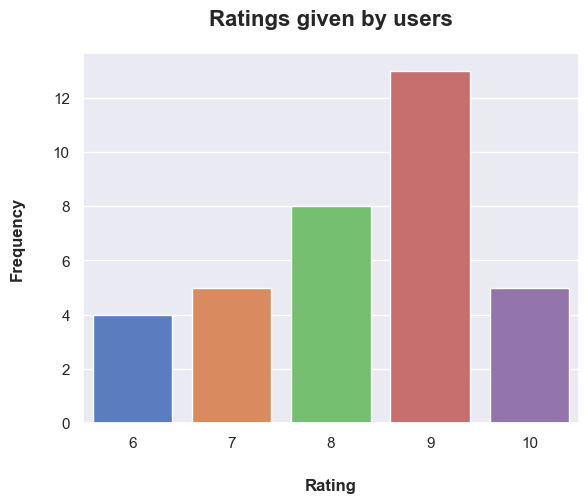

In [106]:
sns.set_style('darkgrid')
sns.set_palette('muted')

sns.countplot(x='rating', data=ratings)

plt.title('Ratings given by users', fontsize=16, fontweight='bold', pad=20, loc='center', fontfamily='Arial')
plt.xlabel('Rating', fontsize=12, fontweight='bold', labelpad=20, fontfamily='Arial')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', labelpad=20, fontfamily='Arial')

plt.show()

Vemos qué tanto se han conectado nuestros usuarios:

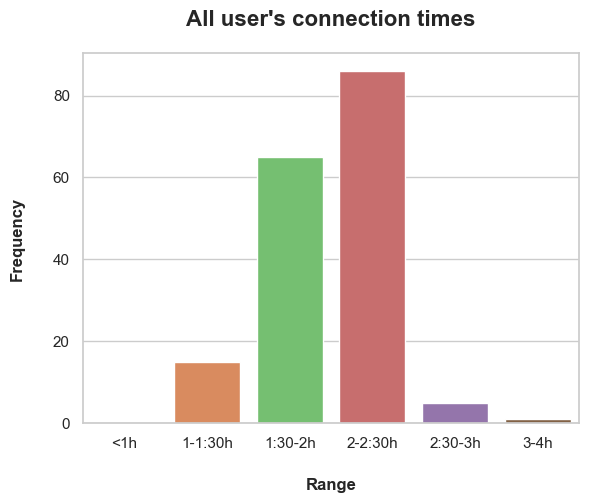

In [107]:
# Extraer los valores numéricos de la columna 'tiempo_conexion'
activity['horas'] = activity['tiempo_conexion'].str.extract('(\d+)h').astype(float)
activity['minutos'] = activity['tiempo_conexion'].str.extract('(\d+)m').astype(float)
# Calcular el tiempo total en horas
activity['tiempo_total'] = activity['horas'] + activity['minutos'] / 60
# Definir los límites y las etiquetas de los rangos
rangos = [0, 1, 1.5, 2, 2.5, 3, 4]
etiquetas = ['<1h', '1-1:30h', '1:30-2h', '2-2:30h', '2:30-3h', '3-4h']
# Dividir los tiempos en los rangos especificados
activity['Rangos'] = pd.cut(activity['tiempo_total'], bins=rangos, labels=etiquetas)

sns.set_style('whitegrid')
sns.set_palette('muted')

sns.countplot(x='Rangos', data=activity)

plt.xlabel('Range', fontsize=12, fontweight='bold', labelpad=20, fontfamily='Arial')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', labelpad=20, fontfamily='Arial')
plt.title('All user\'s connection times', fontsize=16, fontweight='bold', pad=20, loc='center', fontfamily='Arial')

plt.show()


Realizamos un análisis de los 10 usuarios con mayor tiempo de conexión:

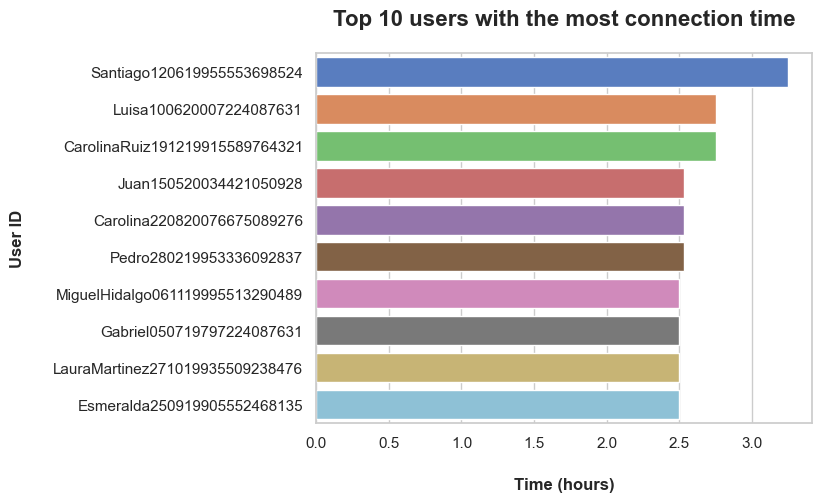

In [108]:
# Top 10 de usuarios con mayor tiempo de conexión
top_10 = activity.sort_values(by='tiempo_total', ascending=False).head(10)

sns.set_style('whitegrid')
sns.set_palette('muted')

sns.barplot(x='tiempo_total', y='id_usuario', data=top_10)

plt.xlabel('Time (hours)', fontsize=12, fontweight='bold', labelpad=20, fontfamily='Arial')
plt.ylabel('User ID', fontsize=12, fontweight='bold', labelpad=20, fontfamily='Arial')

plt.title('Top 10 users with the most connection time', fontsize=16, fontweight='bold', pad=20, loc='center', fontfamily='Arial')

plt.show()


Realizamos un análisis de las 3 películas más vistas y mejor calificadas:

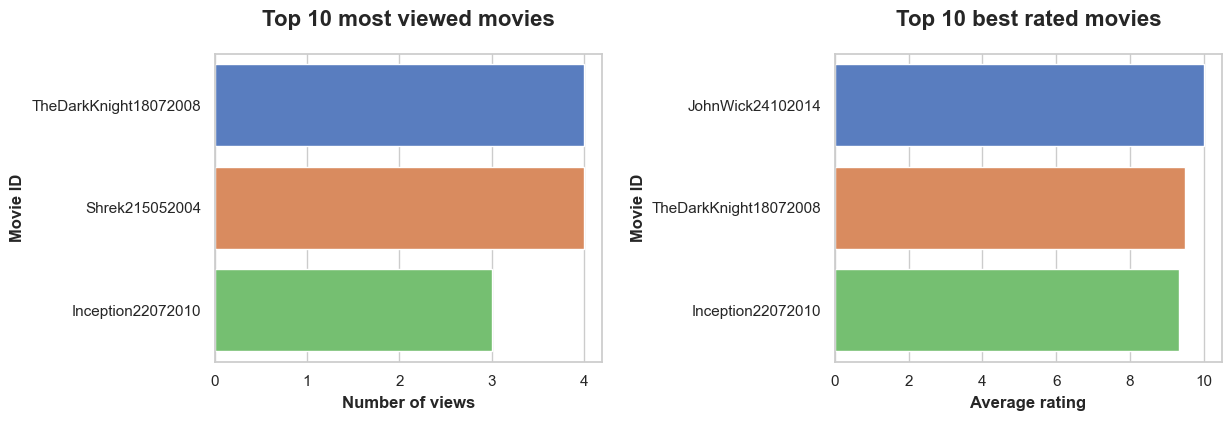

In [109]:
sns.set_style('whitegrid')
sns.set_palette('muted')

fig, ax = plt.subplots(1,2, figsize=(13, 4))

# Top 3 películas más vistas
top_10 = ratings.groupby('id_pelicula').size().sort_values(ascending=False).head(3)
sns.barplot(x=top_10.values, y=top_10.index, orient='h', ax=ax[0])
ax[0].set_xlabel('Number of views', fontsize=12, fontweight='bold', labelpad=5, fontfamily='Arial')
ax[0].set_ylabel('Movie ID', fontsize=12, fontweight='bold', labelpad=5, fontfamily='Arial')
ax[0].set_title('Top 10 most viewed movies', fontsize=16, fontweight='bold', pad=20, loc='center', fontfamily='Arial')

# Top 3 películas mejor valoradas
ratings['promedio'] = ratings.groupby('id_pelicula')['rating'].transform('mean')
top_10 = ratings[['id_pelicula', 'promedio']].drop_duplicates().sort_values(by='promedio', ascending=False).head(3)
sns.barplot(x='promedio', y='id_pelicula', data=top_10, orient='h', ax=ax[1])
ax[1].set_xlabel('Average rating', fontsize=12, fontweight='bold', labelpad=5, fontfamily='Arial')
ax[1].set_ylabel('Movie ID', fontsize=12, fontweight='bold', labelpad=4, fontfamily='Arial')
ax[1].set_title('Top 10 best rated movies', fontsize=16, fontweight='bold', pad=20, loc='center', fontfamily='Arial')

plt.subplots_adjust(wspace=0.6) 

plt.show()

## Análisis de sentimientos de las películas

In [110]:
#!pip install nltk
#!pip install unidecode
#!pip install vaderSentiment

In [111]:
import re

resenias_content = []

for i in ratings['resenias']:
    # Utilizar expresión regular para encontrar las propiedades sin comillas
    pattern = r'(\w+)(?=:)'
    replaced_dict = re.sub(pattern, r'"\1"', i)
    new_dict = eval(replaced_dict)
    resenias_content.append(new_dict['contenido'])

In [112]:
from unidecode import unidecode
from deep_translator import GoogleTranslator

resenias_cleaned = []

for resenia in resenias_content:
    resenia = GoogleTranslator(source='es', target='en').translate(resenia)
    resenia = unidecode(resenia)
    resenia = resenia.lower()
    # Remove punctuation
    resenia = re.sub(r'[^\w\s]', '', resenia)
    resenias_cleaned.append(resenia)

Quitamos los stopwords de las reseñas de las películas:

In [113]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

for i in range(len(resenias_cleaned)):
    resenias_cleaned[i] = ' '.join([word for word in resenias_cleaned[i].split() if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
resenias_cleaned

['masterpiece superhero cinema heath ledger joker amazing',
 'wasnt kind comedy didnt make laugh much',
 'light entertaining comedy hang friends',
 'amazing batman movie heath ledgers performance joker phenomenal',
 'really liked movie acting excellent story exciting',
 'really liked movie plot complex surprising',
 'amazing journey dreams highly recommended',
 'horror classic brilliant performance jack nicholson kept suspense',
 'movie awesome action scenes incredible',
 'liked concept interstellar travel movie',
 'horror movie keep edge seat',
 'amazing movie loved plot visual effects',
 'movie fascinating alan turing amazing character',
 'inception masterpiece cinema plot intriguing keeps edge seat times acting excellent visual effects impressive definitely one favorite movies',
 'unbridled action exciting races love fast furious saga',
 'funny animated comedy charming characters',
 'wolf wall street fascinating film portrays extravagant riotous life stockbroker leonardo dicaprio gi

Comenzamos a ver las reseñas con su correspondiente puntaje de polaridad:

In [115]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

for review in resenias_cleaned:
    sentiment = sia.polarity_scores(review)
    polarity_score = sentiment['compound']
    
    print(f"Reseña: {review}")
    print(f"Puntaje de polaridad: {polarity_score}")
    print()

Reseña: masterpiece superhero cinema heath ledger joker amazing
Puntaje de polaridad: 0.8555

Reseña: wasnt kind comedy didnt make laugh much
Puntaje de polaridad: -0.7789

Reseña: light entertaining comedy hang friends
Puntaje de polaridad: 0.8176

Reseña: amazing batman movie heath ledgers performance joker phenomenal
Puntaje de polaridad: 0.6486

Reseña: really liked movie acting excellent story exciting
Puntaje de polaridad: 0.8748

Reseña: really liked movie plot complex surprising
Puntaje de polaridad: 0.6361

Reseña: amazing journey dreams highly recommended
Puntaje de polaridad: 0.8221

Reseña: horror classic brilliant performance jack nicholson kept suspense
Puntaje de polaridad: 0.0258

Reseña: movie awesome action scenes incredible
Puntaje de polaridad: 0.6249

Reseña: liked concept interstellar travel movie
Puntaje de polaridad: 0.4215

Reseña: horror movie keep edge seat
Puntaje de polaridad: -0.5719

Reseña: amazing movie loved plot visual effects
Puntaje de polaridad: 0.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


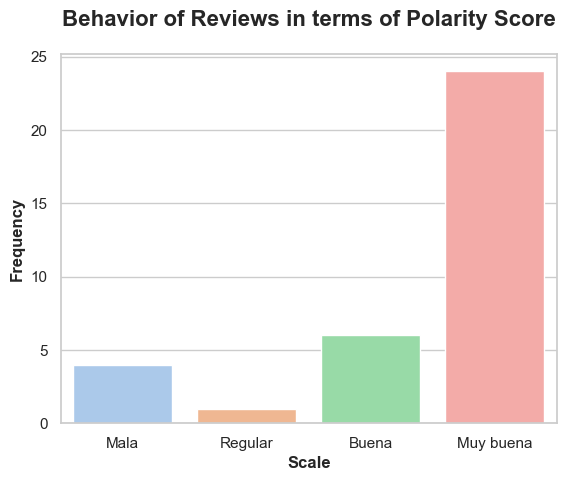

In [118]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Obtener los puntajes de polaridad de las reseñas
polarity_scores = [sia.polarity_scores(review)['compound'] for review in resenias_cleaned]

# Definir los límites y las etiquetas de los rangos
rangos = [-1, -0.5, 0, 0.5, 1]
etiquetas = ['Mala', 'Regular', 'Buena', 'Muy buena']

# Dividir los puntajes de polaridad en los rangos especificados
polarity_ranges = pd.cut(polarity_scores, bins=rangos, labels=etiquetas)

# Configurar el estilo y la paleta de colores
sns.set(style='whitegrid')
sns.set_palette('pastel')

# Crear el countplot
sns.countplot(x=polarity_ranges)

# Configurar los ejes y el título
plt.xlabel('Scale', fontweight='bold', labelpad=4, fontfamily='Arial')
plt.ylabel('Frequency', fontweight='bold', labelpad=4, fontfamily='Arial')
plt.title('Behavior of Reviews in terms of Polarity Score', fontsize=16, fontweight='bold', pad=20, loc='center', fontfamily='Arial')

# Mostrar el gráfico
plt.show()